# Logistic Regression

## Dataset

👇 Load the `university_admissions.csv` dataset from the `data` folder into a dataframe. Display the 5 first rows of the dataframe.

In [19]:
import pandas as pd
import seaborn as sns

In [26]:
uni_df = pd.read_csv('data/university_admissions.csv')
uni_df.head(20)

,rating,CGPA,admitted
0,4,9.88,True
1,4,8.30,True
2,3,6.59,False
3,4,8.96,True
4,1,5.74,True
5,3,7.51,False
6,5,9.51,True
7,2,6.76,True
8,2,5.22,False
9,3,8.48,True


The dataset:
- `rating` : the rating of the university in a range [0,5]
- `CGPA` : the Cumulative Grade Points Average of the student
- `admitted` : whether or not a student is admitted to the university
    
The task:
- Predict if a student will be admitted considering his CGPA and the rating of the university he is applying to.

❓What are the features names?

In [21]:
# Fill the features_names list with the features names
# YOUR CODE HERE
features_names = ['rating', 'CGPA']

❓What is the target name?

In [22]:
# Fill the target_name with the target name
# YOUR CODE HERE
target_name = 'admitted'

## Data visualization

### Figure 1

We would like to visualize the relationships between the features and the target. How would you do that?

<details>
    <summary>
        💡Hint
    </summary>
    2D-scatterplots can help you to visualize the relationships between features and target
</details>

/home/florent/.pyenv/versions/3.8.5/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CGPA', ylabel='admitted'>

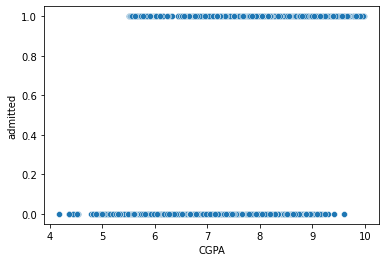

In [25]:
sns.scatterplot(uni_df['CGPA'],uni_df['admitted'])

/home/florent/.pyenv/versions/3.8.5/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='admitted'>

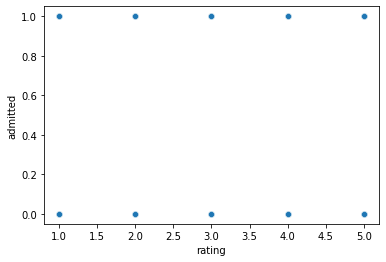

In [41]:
sns.scatterplot(uni_df['rating'], uni_df['admitted'])

❓Do you see any relationship between the `rating` and the success of a student? What about `admitted` vs `CGPA`?

<details>
    <summary>
        👉 Answer
    </summary>
    There seems to be no relationship between <code>rating</code> and <code>admitted</code>. There is no clear relationship between <code>CGPA</code> and <code>admitted</code>. Nevertheless, it appears that students with a <code>CGPA</code> lower than <strong>5</strong> fail to enter the university and students with a <code>CGPA</code> of <strong>10</strong> are admitted.
</details>

> YOUR ANSWER HERE

### Figure 2

We would like to visualize the features and the target on the same plot. How would you do that?

<details>
    <summary>
        💡Hint
    </summary>
    The <code>hue</code> keyword argument on a <a href='https://seaborn.pydata.org/generated/seaborn.scatterplot.html'>Seaborn 2D scatterplot</a> can help you to visualize the features and the target on the same plot. 
</details>

<AxesSubplot:xlabel='CGPA', ylabel='admitted'>

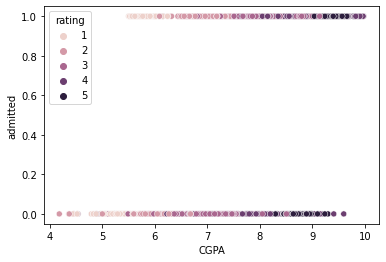

In [37]:
sns.scatterplot(x ='CGPA',y = 'admitted', hue='rating', data=uni_df)

❓Can you find a pattern describing an admitted student?

<details>
    <summary>
        👉 Answer
    </summary>
    The higher the university <code>rating</code>, the higher the minimal <code>CGPA</code> must be to be <code>admitted</code>.
</details>

> Students with higher CGPA get into higher rated universities

Answer the following  questions based on the observation of the figure 2: 

❓Easy question: if your **`CGPA` is 6**, will you be accepted in an university with a **`rating` of 4**?

> Not likely based on the plot

❓Harder question: if your **`CGPA` is 7.8**, will you be accepted in an university with a **`rating` of 3**?

> Likely based on the plot

##  Holdout

👇 Split the data into train and test sets. Take 30% of the dataset for the test set and specify `random_state = 1` for the split.

[Sklearn `train_test_split` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [66]:
from sklearn.model_selection import train_test_split


# Ready Xs and ys
X = uni_df[['CGPA', 'rating']]
y = uni_df['admitted']


# Split into Train/Test: X_train, y_train, X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)


## Modelling

👇 Train and score a Logistic regression model.

[Sklearn `LogisticRegression` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [72]:
# Import the model
from sklearn.linear_model import LogisticRegression
# Instanciate the model
log_model = LogisticRegression()
# Train the model on the training data
log_model.fit(X_train, y_train)
# Print the score of the model on the testing data
log_model.score(X_test,y_test)

0.829004329004329

<details>
    <summary>
        👉Answer
    </summary>
    The model accuracy should reach almost 83%.
</details>

## Predicting

👇 Using your model's methods, answer the following questions.



❓ If your **CGPA is 6**, will you be accepted in an university with a **rating of 4**?

In [73]:
log_model.predict([[6,4]])

array([False])

In [74]:
log_model.predict_proba([[6,4]])

array([[9.99875776e-01, 1.24223827e-04]])

❓Do you agree with the previous result based on your observations (cf Figure 2)?

> This is what we predicted

❓ If your **CGPA is 7.8**, what is the **probability** that you will be accepted in an university with a **rating of 3**?

In [75]:
log_model.predict_proba([[7.8,3]])

array([[0.16728919, 0.83271081]])

<details>
    <summary>
        👉Answer
    </summary>
    The probability of being accepting in a university with a rating of 3 if your CGPA is 7.8 is 83%.
</details>

⚠️ Please, push the exercice once you have completed it 🙃

# 🏁